In [1]:
import pandas as pd

Dataset = pd.read_excel(r'C:/Users/kqb18171/OneDrive - University of Strathclyde/Crystal shape prediction chapter/Crystal_Shape_Classification.xlsx', sheet_name='2-class_imbalanced_rand')

In [2]:
#Dataset.drop(Dataset.iloc[:, 26:76], inplace = True, axis = 1)

#pd.set_option('display.max_columns', 10)

Dataset.head()

,Solvent name,SMILE,apol,ast_fraglike,ast_fraglike_ext,ast_violation,ast_violation_ext,a_acc,a_acid,a_aro,...,weinerPath,weinerPol,zagreb,BP,MP,Density_g-mL,Sol_25c,SS,Conc_mg-mL,CrysShape
0,Acetone,O=C(C)C,10.082758,1,1,0,0,1,0,0,...,9,0,12,56.0,-95.0,0.780,16.71,1.517230,25.352907,Polyhedral
1,Triethylamine,N(CC)(CC)CC,21.661896,1,1,0,0,1,0,0,...,48,6,24,89.0,-114.7,0.726,3.35,1.784985,5.979699,Polyhedral
2,"1,4-Dioxane",O1CCOCC1,13.978344,1,1,0,0,2,0,0,...,27,3,24,101.0,11.8,1.030,63.18,1.482199,93.645351,Needle
3,DMF,O=CN(C)C,11.849551,1,1,0,0,1,0,0,...,18,2,16,153.0,-61.0,0.940,59.49,1.673997,99.586056,Polyhedral
4,Methyl acetate,O=C(OC)C,10.884758,1,1,0,0,1,0,0,...,18,2,16,56.9,-98.0,0.932,10.71,1.199538,12.847055,Needle


In [3]:
print(Dataset.shape)

(216, 215)


In [4]:
# Use numpy to convert to arrays
import numpy as np
# outcomes are the values we want to predict
outcomes = np.array(Dataset['CrysShape'])
# Remove the outcomes from the parameters (data needed for making the prediction)
# axis 1 refers to the columns
features = Dataset.drop(['Solvent name', 'SMILE', 'Conc_mg-mL', 'CrysShape'], axis = 1)
# Saving feature names for later use
features_list = list(features.columns)
# Convert to numpy array
features_list = np.array(features_list)

# train/test split (75/25)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.8148148148148148
maximal accuracy = 0.9814814814814815
mean accuracy = 0.9177777777777778
SD = 0.03274375719303754


# 4-fold Cross-validation

In [6]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [7]:
# Perform 4-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=4)
print ('Cross-validated scores:', scores)
print("average accuracy from 4-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [0.94444444 0.92592593 0.96296296 0.90740741]
average accuracy from 4-fold CV: 0.9351851851851851
standard deviation of accuracy: 0.02070433312499802


# Confusion matrix

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[20  3]
 [ 0 31]]


In [9]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       1.00      0.87      0.93        23
  Polyhedral       0.91      1.00      0.95        31

    accuracy                           0.94        54
   macro avg       0.96      0.93      0.94        54
weighted avg       0.95      0.94      0.94        54



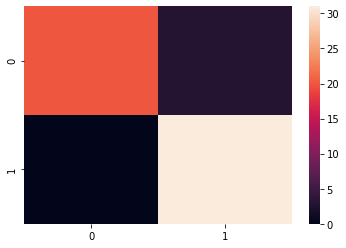

In [10]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

# train/test split (80/20)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.8181818181818182
maximal accuracy = 0.9772727272727273
mean accuracy = 0.9206818181818183
SD = 0.03571798977250022


# 5-fold Cross-validation

In [12]:
# Perform 5-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=5)
print ('Cross-validated scores:', scores)
print("average accuracy from 5-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [0.95454545 0.97674419 0.93023256 0.90697674 0.95348837]
average accuracy from 5-fold CV: 0.9443974630021141
standard deviation of accuracy: 0.02380290561528554


# Confusion matrix

In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[16  1]
 [ 3 24]]


In [14]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       0.84      0.94      0.89        17
  Polyhedral       0.96      0.89      0.92        27

    accuracy                           0.91        44
   macro avg       0.90      0.92      0.91        44
weighted avg       0.91      0.91      0.91        44



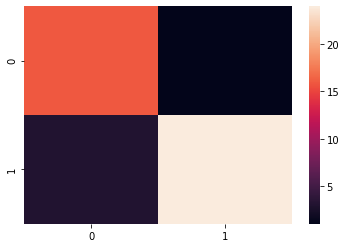

In [15]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

# train/test split (90/10)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x = features
y = outcomes

acc_array = list()
clf_array = list()
xy_array = list()

for i in range(100):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)
        
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #calculate accuracy of the model
    acc = metrics.accuracy_score(y_test, y_pred)
    
    acc_array.append(acc)
    clf_array.append(clf)
    xy_array.append([x_train, x_test, y_train, y_test])
    
#print('Accuracy: ', acc)   
print('minimal accuracy =', np.min(acc_array))
print('maximal accuracy =', np.max(acc_array))
print('mean accuracy =', np.mean(acc_array))
print('SD =', np.std(acc_array))

minimal accuracy = 0.7727272727272727
maximal accuracy = 1.0
mean accuracy = 0.9372727272727271
SD = 0.04580771886306955


# 10-fold Cross-validation

In [17]:
# Perform 10-fold cross validation
scores = cross_val_score(clf.fit(x_train, y_train), x, y, cv=10)
print ('Cross-validated scores:', scores)
print("average accuracy from 10-fold CV:", np.mean(scores))
print("standard deviation of accuracy:", np.std(scores))

Cross-validated scores: [0.95454545 0.90909091 0.95454545 1.         0.86363636 1.
 0.9047619  0.85714286 0.95238095 0.95238095]
average accuracy from 10-fold CV: 0.9348484848484849
standard deviation of accuracy: 0.04749541210894572


# Confusion matrix

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 7  1]
 [ 1 13]]


In [19]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       0.88      0.88      0.88         8
  Polyhedral       0.93      0.93      0.93        14

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22



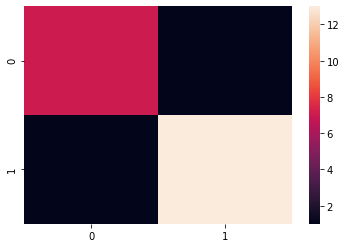

In [20]:
# Visualize it as a heatmap
import matplotlib.pyplot as plt
import seaborn
seaborn.heatmap(conf_mat)
plt.show()